First 5 rows of the dataset:
   Size  Location  Number of Rooms   Price
0  1649     urban                2  247434
1  1458  suburban                4  262960
2  1694     urban                2  268687
3  1956     urban                6  361168
4  1429     rural                3  243873

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Size             100 non-null    int64 
 1   Location         100 non-null    object
 2   Number of Rooms  100 non-null    int64 
 3   Price            100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB
None

Missing Values:
Size               0
Location           0
Number of Rooms    0
Price              0
dtype: int64
Dataset after encoding:
   Size  Number of Rooms     Price  Location_suburban  Location_urban
0  1649                2  247434.0              False  

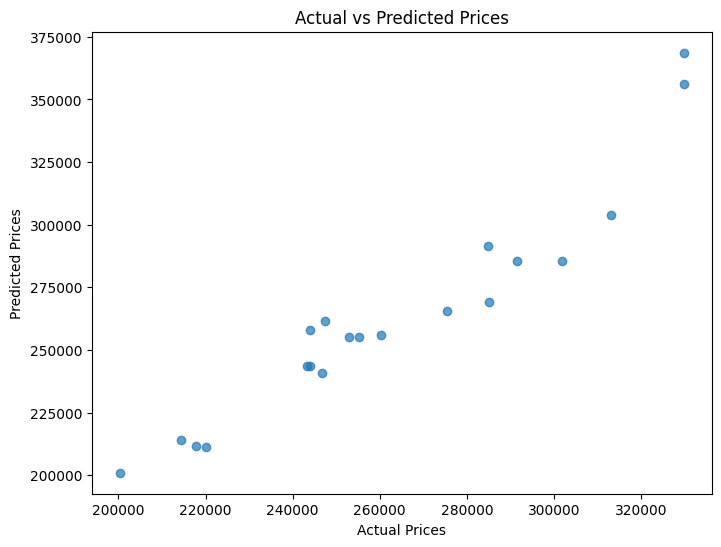

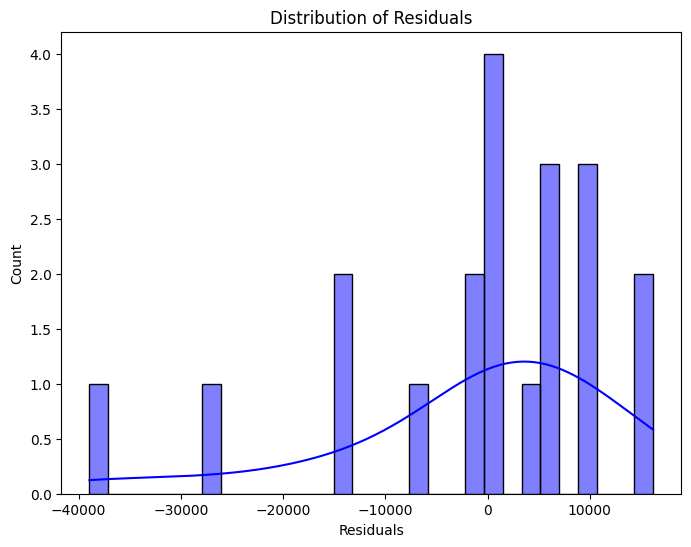

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
# Assuming 'house_prices.csv' is in the current directory
data = pd.read_csv('C:\\Users\\saile\\Downloads\\house_prices.csv')  # Replace with actual file path
print("First 5 rows of the dataset:")
print(data.head())

# Dataset info
print("\nDataset Information:")
print(data.info())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Fill missing values (example: median for numerical columns)
data['Size'] = data['Size'].fillna(data['Size'].median())
data['Number of Rooms'] = data['Number of Rooms'].fillna(data['Number of Rooms'].median())

# Handle outliers (example: capping)
upper_limit = data['Price'].quantile(0.95)
data['Price'] = np.where(data['Price'] > upper_limit, upper_limit, data['Price'])

# Encoding the 'Location' column using one-hot encoding
data = pd.get_dummies(data, columns=['Location'], drop_first=True)
print("Dataset after encoding:")
print(data.head())

from sklearn.preprocessing import MinMaxScaler

# Normalize numerical columns
scaler = MinMaxScaler()
data[['Size', 'Number of Rooms']] = scaler.fit_transform(data[['Size', 'Number of Rooms']])

# Define features and target variable
X = data.drop('Price', axis=1)
y = data['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Display coefficients
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

# Scatter plot of actual vs predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.show()